In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv('dataset.csv',header = None)
data_classes = ['R','M']
d = {'R':-1,'M':1}
data[60] = data[60].map(d, na_action='ignore')
data = data.sample(frac=1)

In [132]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])

# train and validation of perceptron / one by one input

In [133]:
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [134]:
class Perceptrons:
    def predict(self, X):
        return ((np.dot(self.add_bias(X), self.weights) >= 0)*2)-1
    
    def singlepredict(self, X):
        return ((np.dot(X, self.weights) >= 0) * 2)-1
    
    def fit(self, X, y,X_val,y_val, itr, lr):
        X = self.add_bias(X)
        X_val = self.add_bias(X_val)
        self.weights = np.zeros(X.shape[1])
        errors = []
        errors_val = []
        weight_list = []
        for _ in range(itr): 
            for i in range(X.shape[0]):
                self.weights += lr * np.dot((y[i] - self.singlepredict(X[i,:])), X[i])
            mysum_validation = np.abs((y_val - self.predict(X_val[:,1:])))
            errors_val.append(np.sum(mysum_validation))
            mysum = np.abs((y - self.predict(X[:,1:])))
            errors.append(np.sum(mysum)) 
            weight_list.append(self.weights)
        return errors,errors_val,weight_list
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    


In [135]:
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
clf = Perceptrons()
error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,10000,0.001)
y_pred = clf.predict(X_validate)
accuracy(y_validate,y_pred)

0.6666666666666666

Text(0, 0.5, 'number of missclassification')

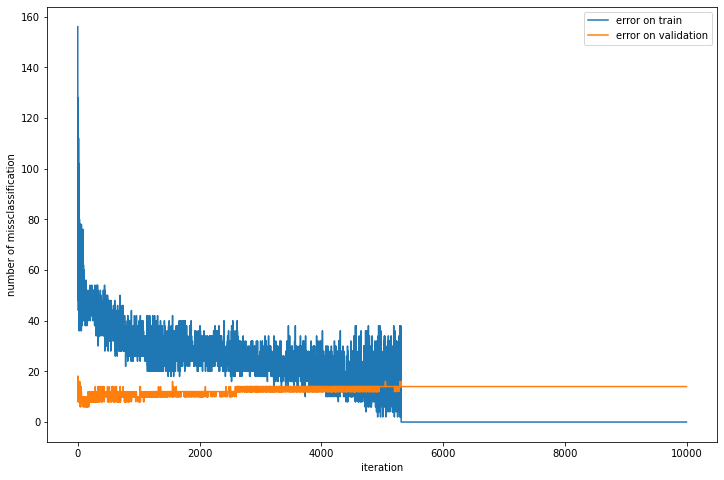

In [136]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(error,label='error on train')
ax.plot(error_val,label='error on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('number of missclassification')

In [137]:
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()
y_pred = clf.predict(X_test)
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
accuracy(y_test,y_pred)

0.7619047619047619

In [138]:
def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)
confusion_df(y_test,y_pred)


predict,-1,1
actual,,
-1,17,4
1,6,15


In [126]:
acc_list = []
for i in range(30):
    data = pd.read_csv('dataset.csv',header = None)
    data_classes = ['R','M']
    d = {'R':-1,'M':1}
    data[60] = data[60].map(d, na_action='ignore')
    data = data.sample(frac=1)
    train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
    X_train = train.drop(60, axis=1).to_numpy()
    y_train = train[60].to_numpy()
    X_validate = validate.drop(60, axis=1).to_numpy()
    y_validate = validate[60].to_numpy()
    X_test = test.drop(60, axis=1).to_numpy()
    y_test = test[60].to_numpy()
    error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,1900,0.001)
    y_pred = clf.predict(X_test)
    acc_list.append(accuracy(y_test,y_pred))
    i+=1
print(np.mean(acc_list))

0.7142857142857142


# train and validation of perceptron / batch input

In [286]:
class Perceptrons:
    def predict(self, X):
        return (np.dot(self.add_bias(X), self.weights) >= 0) * 1
    
    def fit(self, X, y,X_val,y_val, itr, lr):
        X = self.add_bias(X)
        X_val = self.add_bias(X_val)
        self.weights = np.zeros(X.shape[1])
        errors = []
        errors_val = []
        weight_list = []
        for _ in range(itr): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            mysum = np.abs((y - self.predict(X[:,1:])))
            mysum_validation = np.abs((y_val - self.predict(X_val[:,1:])))
            errors.append(np.sum(mysum)/y.shape[0]) 
            errors_val.append(np.sum(mysum_validation)/y_val.shape[0])
            weight_list.append(self.weights)
        return errors,errors_val,weight_list
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    


In [287]:
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
clf = Perceptrons()
error,error_val,weights_list = clf.fit(X_train,y_train,X_validate,y_validate,10000,0.01)
y_pred = clf.predict(X_validate)
accuracy(y_validate,y_pred)

0.7619047619047619

Text(0, 0.5, 'number of missclassificatio')

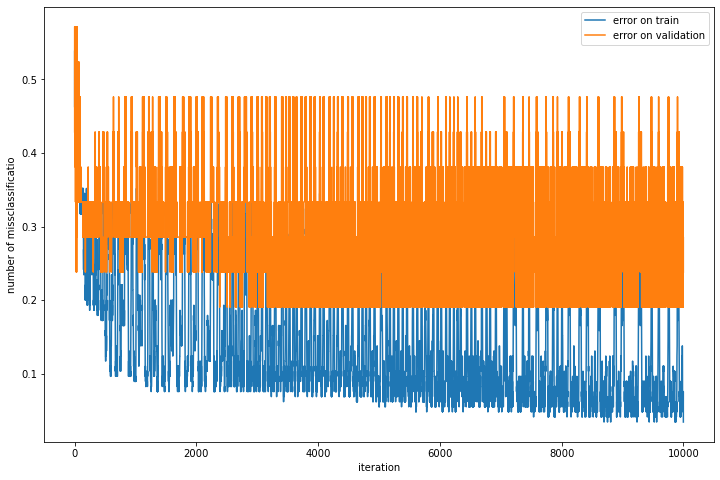

In [288]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(error,label='error on train')
ax.plot(error_val,label='error on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('number of missclassificatio')